## TITANIC DATASET ANALYSIS

The data has been taken from Kaggle Titanic challenge.
URL- https://www.kaggle.com/c/titanic

Analysis to be done:
    1. passenger analysis(age, gender,travel class)
    2.deck the passengers were on and the travelling class
    3.where did the passengers came from?
    4.solo or family trip
    5. factors that helped passengers survival:
        a. relation between deck and survival rate
        b. presence of family member and survival rate


In [1]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the csv file
titanic_df = pd.read_csv('train.csv')

#previewing the read data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


describing the variables

    survived: 0-false, 1-true(did survive)
    Pclass- travelling class of passenger
    SibSp- do the passenger have sibling on borad,0-false, 1-true
    Parch- If the passengers had a parent or child on borad, 0-false, 1-true
    Embarked- S,C,Q denote the cities



In [3]:
#extracting basic info available from the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Passenger Analysis

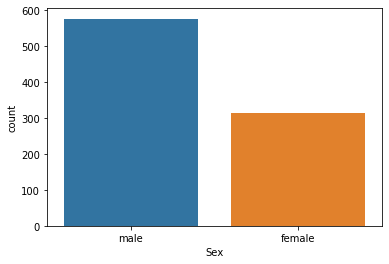

In [4]:
#plotting the gender of passengers present on the ship
sns.countplot(x=titanic_df['Sex'],data=titanic_df)

Conclusion: There were more number of male passengers than female passengers

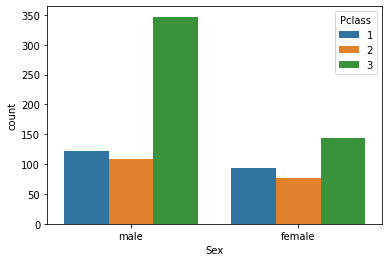

In [5]:
#separating the genders by travel classes
sns.countplot(x=titanic_df['Sex'],data=titanic_df,hue='Pclass')

Conclusion: There were more number of both male and female passengers in the third class. The second class recorded the least number of both male and female passengers.

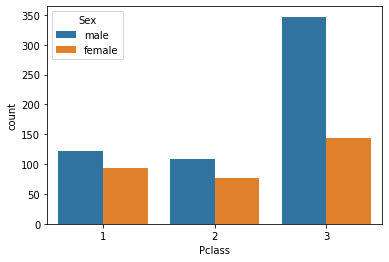

In [6]:
sns.countplot(x=titanic_df['Pclass'],data=titanic_df,hue='Sex')

In [7]:
#function to categorize the passengers as male, female and child. Child if age<16
def male_female_child(passenger):
    age ,sex= passenger
    
    if age<16:
        return 'child'
    else:
        return sex

In [8]:
#creating a new column person and using the function we made above to categorize the passengers
titanic_df['Person']= titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

#previewing the updated dataframe
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


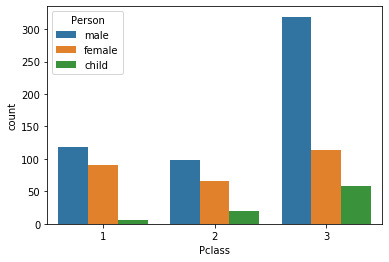

In [9]:
#replotting on the basis of person
sns.countplot(x=titanic_df['Pclass'],data=titanic_df,hue='Person')

Conclusion: There were least number of children in the first class. Third class had the most nmber of children.

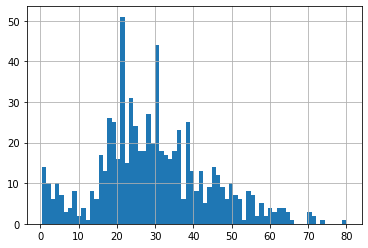

In [10]:
#plotting a histogram on the basis of age of the passengers
titanic_df['Age'].hist(bins=70)

Conclusin: The graph shows most of the passengers were between the age of 20-30 years. Also, the mean age of passengers should be around 25-30 years 

In [11]:
#calculating the mean age of the passengers
titanic_df['Age'].mean()

29.69911764705882

In [12]:
#looking at the exact numbers of male, female and child passengers
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

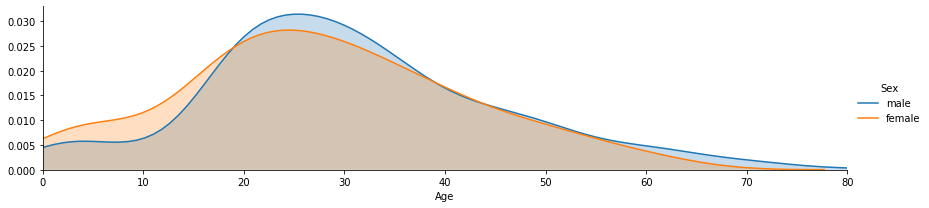

In [13]:
#ploting a Kernel Desity Polt based on the Age
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest= titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

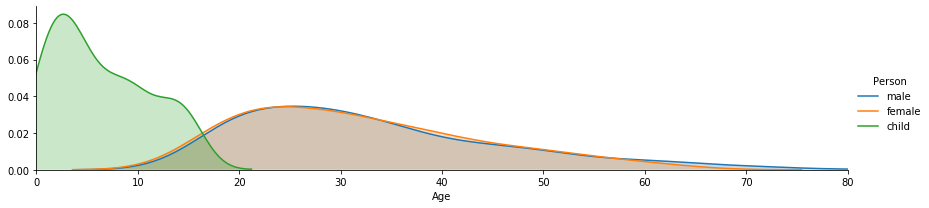

In [14]:
#ploting a Kernel Desity Polt based on Male, Female or Child
fig = sns.FacetGrid(titanic_df,hue='Person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest= titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

point to be noticed:
we had set the age limit of child to 16 but the plot extends a liitle bit 
further than 20 years. That is because of the bandwidth.


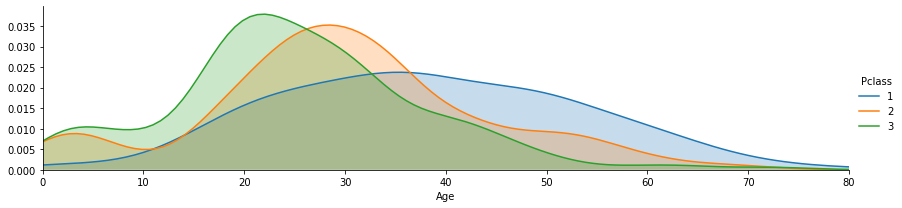

In [15]:
#ploting a Kernel Desity Polt based on the passengers class
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest= titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

# Deck on which passengers were travelling

In [16]:
#dropping all the NaN values present in the Cabin column
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

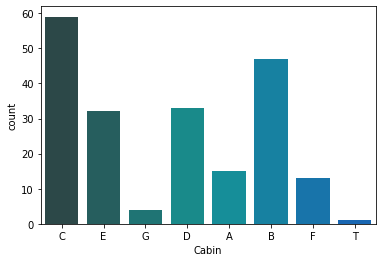

In [17]:
#making a list of the deck level of passengers
deck_level=[]

for level in deck:
    deck_level.append(level[0])
    
cabin_df=DataFrame(deck_level)
cabin_df.columns=['Cabin']
sns.countplot(x=cabin_df['Cabin'],data=cabin_df,palette='winter_d')

Conclusion: There are only 6 decks, namely A, B, C, D, E and F. Notice the 'T' outlier. We will have to get rid of it.

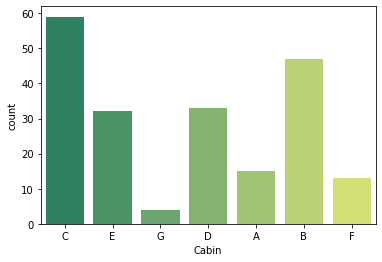

In [18]:
#Getitng rid of the 'T'outlier.
cabin_df = cabin_df[cabin_df.Cabin !='T']

sns.countplot(x=cabin_df['Cabin'],data=cabin_df,palette='summer')

Conclusion: Deck C records the maximum number of passengers and deck G records the minimum number of passengers.

# where did the passengers came from?

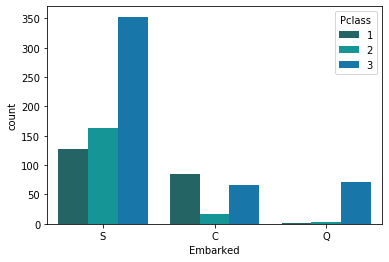

In [19]:
#Plotting the boarding of passengers from the three ports: S,C and Q and the Classes they boarded in
sns.countplot(x=titanic_df['Embarked'],data=titanic_df,palette='winter_d',hue='Pclass')

Conclusion: Port S records the maximum number of passengers. Port Q has relatively higher numbers of passengers opting for the third class over first and second whereas port C records relatively lower number of second class passengers.

# Finding if the passengers were travelling alone or with family


In [20]:
#Finding if the passengers were travelling alone or with family

#summing up the numbers in the number of Sibling and number of Parent column and forming a new column named 'Alone'
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

#If titanic_df['Alone']>0, mark With family, else mark as Alone
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'                       
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

titanic_df.head()

C:\Users\ANJALI\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


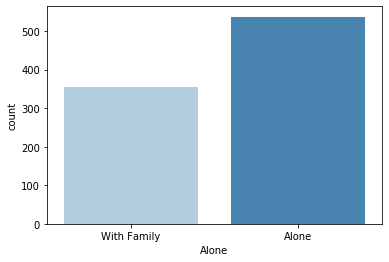

In [21]:
#plotting a countplot on the basis of if the passenger was travelling alone or with family
sns.countplot('Alone',data=titanic_df,palette='Blues')

## What factor helped a passenger survive?

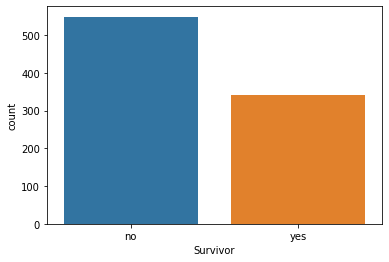

In [22]:
#making a new column 'Survivor' and marking value 0 as no and 1 as yes 
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

sns.countplot('Survivor',data=titanic_df)

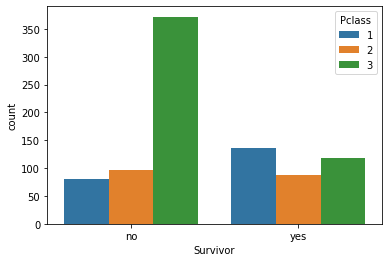

In [23]:
#check if class was a factor
sns.countplot('Survivor',data=titanic_df,hue='Pclass')

Conclusion: Class 3 recorded maximum deats and class 1 had the maximum nuber of survivours.

C:\Users\ANJALI\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


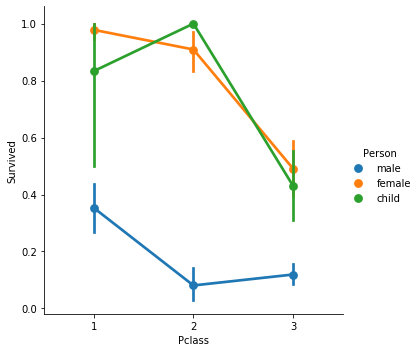

In [24]:
#plotting a factorplot to see the chances of survival for a passenger of specific class and a specific gender
sns.factorplot('Pclass','Survived',hue='Person',data=titanic_df)

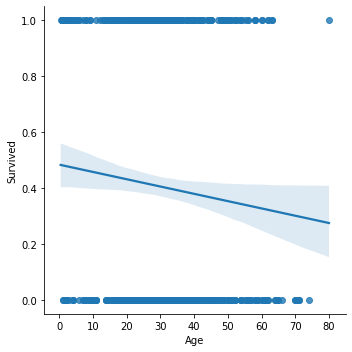

In [25]:
#plotting a linearplot to consider the role played by age in determining chances for survival
sns.lmplot('Age','Survived',data= titanic_df)

Conclusion: We see a general trend that the older the person was, the less likely were his chances of survival.

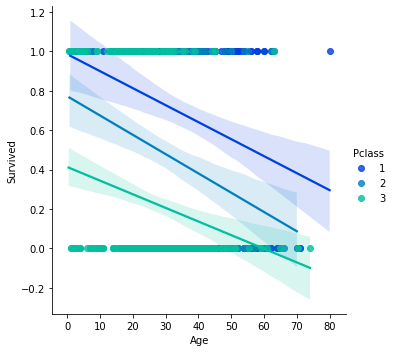

In [26]:
#plotting a to monitor the effect of passenger's class and age on chances of survival
sns.lmplot('Age','Survived',hue='Pclass',palette='winter',data= titanic_df)

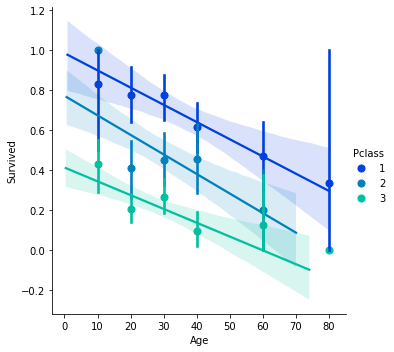

In [27]:
#using bins for a more clear idea
generations=[10,20,30,40,60,80]

sns.lmplot('Age','Survived',hue='Pclass',palette='winter',data= titanic_df,x_bins=generations)

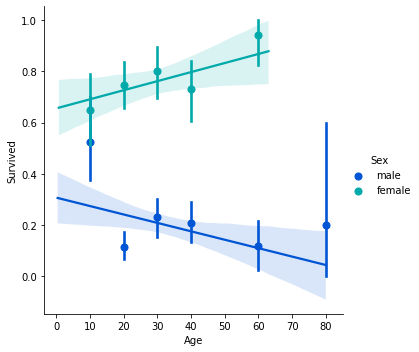

In [28]:
sns.lmplot('Age','Survived',hue='Sex',palette='winter',data= titanic_df,x_bins=generations)

Conclusion: Older females had a better chances of survival than the rest of the passengers. 

RELATION BETWEEN DECK NUMBER AND SURVIVAL 

C:\Users\ANJALI\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


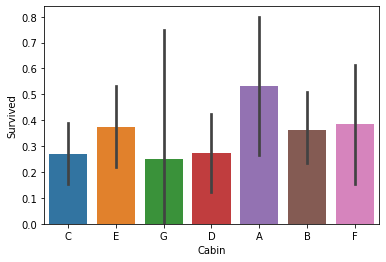

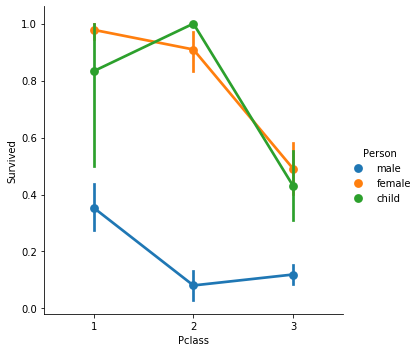

In [29]:
#plotting passengers boarding cabin and survived column
sns.barplot(x=cabin_df['Cabin'],y=titanic_df['Survived'])

sns.factorplot('Pclass','Survived',hue='Person',data=titanic_df)

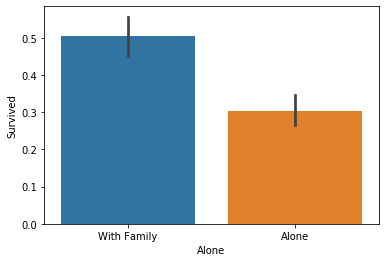

In [30]:
sns.barplot(x=titanic_df['Alone'],y=titanic_df['Survived'])

Conclusion: Passengers travelling with family had more number of survivers